## Hello!
This is the answer script for the tutorial of Chapter 6. Before we begin, make sure you have proper access to FDK in your current working directory!

___________

In [6]:
## Import packages
import streamlit as st

### Q1

In [ ]:
#Try to run PhotoStore here if you would like to
!streamlit run photostore_app.py

**Note**:
* I will write the new source code below to keep the tutorial notebooks consistent in format. If you want to try it out, execute instead, the new Streamlit App scripts inside this answer folder!
* There are more than 1 way to solve this problem so it's okay if your solution looks different from mine! Just go ahead and try to think up all kinds of wild solution that you have.
* Just for fun: There is a minor, inconsequential bug in this implementation due to how Streamlit refreshes, can you find what is it? :) 
    * Feel free to skip this entirely >:).

In [7]:
#Code for Completed PhotoStore
## Import packages
import streamlit as st
import os, shutil

from PIL import Image
from photostore import PhotoStore as PS
from width_control import * 


### --------------------- Flow Outline ----------------------------------
# Implementing 20 functions, 2 with inputs and 18 without.



### --------------------- Config Section ----------------------------------

## Setup page config
st.set_page_config(
    page_title="PhotoStore - Definitely not PhotoShop!",
    page_icon=":camera:",
    layout="centered",
    initial_sidebar_state="collapsed",
)

## Add width control
select_block_container_style()


## Setup temp working folder for state saving
#Create a new one if not exist
if not os.path.isdir("temp_images"):
    os.mkdir("temp_images")



# ------------- NEW STUFF FOR ANSWER HERE ------------- 

#In order to do undo / redo, we will have to change how temp_status is calculated! 
#No longer just setting temp_status = len(os.listdir("temp_images")), we a better way that can be manipulated
#We unfortunately can't just keep it in a variable in memory because streamlit restarts (and flushes the variables in memory) on button clicks!

#Therefore, we will have to reate new text file that writes the latest temp_status value in it
if not os.path.isfile("temp_status.txt"):
    
    with open("temp_status.txt","w+") as file_: #w+ means to write and if the file does not exist, make one
        temp_status = 0 
        file_.write(str(temp_status)) #only accepts str as input to write


else:

    with open("temp_status.txt","r") as file_: #r means read
        temp_status = int(file_.read()) #read and cast as integer
    

## We will also have to change how save_temp works for a bit
def save_temp(temp_status,ps):
    """
    Simple function to save temp images. Called repetitively.
    """
    temp_status += 1
    img_name = '{}.jpg'.format(str(temp_status))
    ps.save_image(img,"temp_images/{}".format(img_name))

    #Update temp_status.txt
    with open("temp_status.txt","w") as file_: #w means to write only
        file_.write(str(temp_status)) #only accepts str as input to write


    return temp_status
    

# ------------- NEW STUFF FOR ANSWER HERE ------------- 



### --------------------- Header Section ----------------------------------
#Create header
st.header("Welcome to PhotoStore")
st.info("Insert your info and app explanation here :smile:")
st.markdown("""This is a simple python streamlit app that does simple image manipulation.
            Insert your own image :camera: below to give it a go!""")

col1, col2, col3 = st.beta_columns(3)
with col1:
   st.image("https://static.streamlit.io/examples/cat.jpg", use_column_width=True)

with col2:
   st.image("https://static.streamlit.io/examples/dog.jpg", use_column_width=True)

with col3:
   st.image("https://images.unsplash.com/photo-1516467508483-a7212febe31a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80", use_column_width=True)



### --------------------- Upload Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)

#Create subheader
st.subheader("Provide a picture to begin!")

#Define var first, otherwise get error of var "img" is not defined!
img = None

#Provide picture by upload
uploaded_file = st.file_uploader("Alternatively upload a file")
if uploaded_file is not None and temp_status < 1:
    img = Image.open(uploaded_file)
    st.success("Uploaded.")


    # ------------- NEW STUFF FOR ANSWER HERE ------------- 

    #Let's save a copy of the raw image in temp_images for temp_status of 0; exactly like PhotoStore in Chapter 3's Tutorial
    img_name = '{}.jpg'.format(str(temp_status))
    img.save("temp_images/{}".format(img_name))

    # ------------- NEW STUFF FOR ANSWER HERE ------------- 


#Override above with temp_status dictated image
if temp_status > 0:
    img = Image.open("temp_images/{}.jpg".format(str(temp_status)))



### --------------------- Display Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)
st.subheader("Main Display")

#Create empty placeholder
main_display = st.empty()
use_col_width = False 


#Display image only if not None, otherwise error!
if img:
    main_display.image(img, use_column_width=use_col_width)


### --------------------- Editing Section ----------------------------------
st.subheader("Input Independent Editing Controls")

#Instantiate PS class
ps = PS(img)


## Create layout!
#4 buttons per row; currently have 18 input-less functions (button based)
#Total of 5 rows
row1_col1, row1_col2, row1_col3, row1_col4 = st.beta_columns(4)
row2_col1, row2_col2, row2_col3, row2_col4 = st.beta_columns(4)
row3_col1, row3_col2, row3_col3, row3_col4 = st.beta_columns(4)
row4_col1, row4_col2, row4_col3, row4_col4 = st.beta_columns(4)
row5_col1, row5_col2 = st.beta_columns(2)



#Row 1
with row1_col1:
    #Flip vertical
    if st.button("Flip Vertical"):

        #Perform action and update display
        img = ps.flip_image(img,'vertical')
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row1_col2:
    #Flip vertical
    if st.button("Flip Horizontal"):

        #Perform action and update display
        img = ps.flip_image(img,'horizontal')
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row1_col3:
    #Resize up, fixed proportions
    if st.button("Resize Up (+10%)"):

        #Perform action and update display
        img = ps.resize_image_uniform(img,1.1)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row1_col4:
    #Resize down, fixed proportions
    if st.button("Resize Down (-10%)"):

        #Perform action and update display
        img = ps.resize_image_uniform(img,0.9)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)



#Row 2
with row2_col1:
    #Saturation up
    if st.button("Saturation Up (+10%)"):

        #Perform action and update display
        img = ps.change_saturation(img,1.1)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row2_col2:
    #Saturation down
    if st.button("Saturation Down (-10%)"):

        #Perform action and update display
        img = ps.change_saturation(img,0.9)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row2_col3:
    #Contrast up
    if st.button("Contrast Up (+10%)"):

        #Perform action and update display
        img = ps.change_contrast(img,1.1)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row2_col4:
    #Contrast down
    if st.button("Contrast Down (-10%)"):

        #Perform action and update display
        img = ps.change_contrast(img,0.9)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)



#Row 3
with row3_col1:
    #Brightness up
    if st.button("Brightness Up (+10%)"):

        #Perform action and update display
        img = ps.change_brightness(img,1.1)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row3_col2:
    #Brightness down
    if st.button("Brightness Down (-10%)"):

        #Perform action and update display
        img = ps.change_brightness(img,0.9)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row3_col3:
    #Sharpness up
    if st.button("Sharpness Up (+10%)"):

        #Perform action and update display
        img = ps.change_sharpness(img,1.1)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row3_col4:
    #Sharpness down
    if st.button("Sharpness Down (-10%)"):

        #Perform action and update display
        img = ps.change_sharpness(img,0.9)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)



#Row 4
with row4_col1:
    #Rotate counter-clockwise
    if st.button("Rotate (+10 degrees)"):

        #Perform action and update display
        img = ps.rotate_image(img,10)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


with row4_col2:
    #Rotate clockwise
    if st.button("Rotate (-10 degrees)"):

        #Perform action and update display
        img = ps.rotate_image(img,-10)
        main_display.image(img, use_column_width=use_col_width) 

        #Update temp_status and save image
        temp_status = save_temp(temp_status,ps)


# ------------- NEW STUFF FOR ANSWER HERE ------------- 

with row4_col3:
    #Undo
    if st.button("Undo"):
        
        #Very simply just move subtract temp_status
        #Check first if we're at bottom (e.g. 0)
        if temp_status == 0:
            st.warning("No more steps to undo!") #do nothing

        else:
            temp_status -= 1 #subtract

            #Update temp_status.txt
            with open("temp_status.txt","w") as file_: #w means to write only
                file_.write(str(temp_status)) #only accepts str as input to write


with row4_col4:
    #Redo
    if st.button("Redo"):

        #Very simply just move add temp_status
        #Check first if we're at top (e.g. len(os.listdir(temp_images)) - 1)
        if temp_status == len(os.listdir("temp_images")) - 1:
            st.warning("No more steps to redo!")

        else:
            temp_status += 1 #add

            #Update temp_status.txt
            with open("temp_status.txt","w") as file_: #w means to write only
                file_.write(str(temp_status)) #only accepts str as input to write


# ------------- NEW STUFF FOR ANSWER HERE ------------- 


#Row 5
with row5_col1:
    #Save Image
    if st.button("Save Image"):

        #Perform action and update display
        ps.save_image(img,"your_edited_image.jpg")
        st.success("Saved to {}".format(os.path.abspath('./')))

        #No temp_status update for this one



# ------------- NEW STUFF FOR ANSWER HERE ------------- 

with row5_col2:
    #Reset Image
    if st.button("Reset Image"):
        
        #For reset, let's preserve this history up to this point thus far.
        #Let's just make the next image (e.g. latest img in temp_images) be the raw image itself
        curr_img = Image.open("temp_images/0.jpg")

        #Update temp_status and save image as usual
        temp_status += 1
        img_name = '{}.jpg'.format(str(temp_status))
        curr_img.save("temp_images/{}".format(img_name))

        #Update temp_status.txt
        with open("temp_status.txt","w") as file_: #w means to write only
            file_.write(str(temp_status)) #only accepts str as input to write


# ------------- NEW STUFF FOR ANSWER HERE ------------- 


## Input-dependent function: Cropping
st.subheader("Crop Image Controls")

#Get coordinates
crop_coords = st.text_input("Crop Coordinates")


#Crop
if crop_coords:

    #Turn input into a list of integers
    crop_coords = crop_coords.split(",") #Split string input into different elements by ',' 
    crop_coords = list(map(int,crop_coords)) 

    #Crop
    img = ps.crop_image(img,crop_coords)
    main_display.image(img, use_column_width=use_col_width) 

    #Update temp_status and save image
    temp_status = save_temp(temp_status,ps)



## Input-dependent function: Put Text
st.subheader("Text Insert Controls")

#Get text and coordinates
text = st.text_input("Text to Insert")
text_coords = st.text_input("Text Coordinates")

#Put Text
if text_coords and text:
    st.error("Not implemented yet! Your tutorial to do so!")



### --------------------- End Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)
st.subheader("Finished? Click to Clear!")

#If already exist, clear it of previous work
if st.button("Clear Workspace"):
    shutil.rmtree("temp_images")


In [ ]:
#Give the new completed app a spin
!streamlit run q1_answer_app.py

___________

### Q2

**Note**: This is an optional question, but an answer has been provided below since the topic was discussed at length in the lesson video. However, this question is rather challenging, so go ahead if you like a good challenge!

**Note**:
* The Detector's output is a custom Detectron2 object that contains a dict with the output that we need.
* Use `output['instances'].get_fields()` to get said dict from the raw output from the Detector.
    * The keys of this dict are `['pred_boxes', 'scores', 'pred_classes', 'pred_masks']`.
* The specific key we're looking for is `pred_classes`! 
    * Refer to the `thing_classes` variables from the `detectron2_coco2017_labels.py` file. 
    * The values in `pred_classes` can be used as an index value to index `thing_classes` to retrieve the actual class label in human readable form.
* However, the above is for reference only. The key to filtering out the final visualized / drawn on images would be to mess / modify the `Visualizer` class from Detectron2.
    * In the background of the `detect.py` file, we used the `Visualizer` class from Detectron2 to help parse the model output due to its complexity.
* Essentially what we will be doing below is to *create a custom Visualizer that will have an input argument to modify what will be drawn in the final output*. Pretty simple conceptually, but the code is a bit messy since we are effectively monkey-wrenching it >:D. 
* With the above info, we can now exclude certain predictions in output as part of our filtering need!
* Also, we will have to make a new `visualize` function for the `Detector` based on our `custom_Visualizer` below, as the current `Detector` uses the default `Visualizer`.


**Side Note**:
* If you're curious on how I get to the solution below, very simply it is as mentioned in the lesson video - I digged through `Detectron2`'s source code and tried to reverse engineer the releveant portion of the code; in our case the `Visualizer` class sectoin of code.
* Relevant Detectron2 source code here: https://github.com/facebookresearch/detectron2/blob/c30cdbb2cece60d2a003b4c780c323e2338e3b7f/detectron2/utils/visualizer.py#L223

In [23]:
#Import Detectron2 base modules and others
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.colormap import random_color
import numpy as np

In [24]:
#Code custom Visualizer
class custom_Visualizer(Visualizer):
    
    def __init__(self,classes_to_include, img_rgb, metadata=None, scale=1.0, instance_mode=0):
        super().__init__(img_rgb, metadata=metadata, scale=scale, instance_mode=0)
        
        self.classes_to_include = classes_to_include
        
        
    def overlay_instances(
        self,
        *,
        boxes=None,
        labels=None,
        masks=None,
        keypoints=None,
        assigned_colors=None,
        alpha=0.5
    ):
        """
        Args:
            boxes (Boxes, RotatedBoxes or ndarray): either a :class:`Boxes`,
                or an Nx4 numpy array of XYXY_ABS format for the N objects in a single image,
                or a :class:`RotatedBoxes`,
                or an Nx5 numpy array of (x_center, y_center, width, height, angle_degrees) format
                for the N objects in a single image,
            labels (list[str]): the text to be displayed for each instance.
            masks (masks-like object): Supported types are:
                * :class:`detectron2.structures.PolygonMasks`,
                  :class:`detectron2.structures.BitMasks`.
                * list[list[ndarray]]: contains the segmentation masks for all objects in one image.
                  The first level of the list corresponds to individual instances. The second
                  level to all the polygon that compose the instance, and the third level
                  to the polygon coordinates. The third level should have the format of
                  [x0, y0, x1, y1, ..., xn, yn] (n >= 3).
                * list[ndarray]: each ndarray is a binary mask of shape (H, W).
                * list[dict]: each dict is a COCO-style RLE.
            keypoints (Keypoint or array like): an array-like object of shape (N, K, 3),
                where the N is the number of instances and K is the number of keypoints.
                The last dimension corresponds to (x, y, visibility or score).
            assigned_colors (list[matplotlib.colors]): a list of colors, where each color
                corresponds to each mask or box in the image. Refer to 'matplotlib.colors'
                for full list of formats that the colors are accepted in.
        Returns:
            output (VisImage): image object with visualizations.
        """
        
        num_instances = None
        if boxes is not None:
            boxes = self._convert_boxes(boxes)
            num_instances = len(boxes)
        if masks is not None:
            masks = self._convert_masks(masks)
            if num_instances:
                assert len(masks) == num_instances
            else:
                num_instances = len(masks)
        if keypoints is not None:
            if num_instances:
                assert len(keypoints) == num_instances
            else:
                num_instances = len(keypoints)
            keypoints = self._convert_keypoints(keypoints)
        if labels is not None:
            assert len(labels) == num_instances
        if assigned_colors is None:
            assigned_colors = [random_color(rgb=True, maximum=1) for _ in range(num_instances)]
        if num_instances == 0:
            return self.output
        if boxes is not None and boxes.shape[1] == 5:
            return self.overlay_rotated_instances(
                boxes=boxes, labels=labels, assigned_colors=assigned_colors
            )

        # Display in largest to smallest order to reduce occlusion.
        areas = None
        if boxes is not None:
            areas = np.prod(boxes[:, 2:] - boxes[:, :2], axis=1)
        elif masks is not None:
            areas = np.asarray([x.area() for x in masks])

            
        if areas is not None:
            sorted_idxs = np.argsort(-areas).tolist()
            # Re-order overlapped instances in descending order.
            boxes = boxes[sorted_idxs] if boxes is not None else None
            labels = [labels[k] for k in sorted_idxs] if labels is not None else None
            masks = [masks[idx] for idx in sorted_idxs] if masks is not None else None
            assigned_colors = [assigned_colors[idx] for idx in sorted_idxs]
            keypoints = keypoints[sorted_idxs] if keypoints is not None else None

            
        for i in range(num_instances):
            
            
            """ -------------------- Look here --------------------"""
            
            ##Filter classes
            #Check the current instance's / detection's class 
            curr_class = labels[i]
            curr_class = ' '.join(curr_class.split()[:-1])
            
            #Filter if it's of certain class type
            if curr_class not in self.classes_to_include:
                continue #skip if not in
            
            """ -------------------- Look here --------------------"""
            
            color = assigned_colors[i]
            
            if boxes is not None:
                self.draw_box(boxes[i], edge_color=color)

            if masks is not None:
                for segment in masks[i].polygons:
                    self.draw_polygon(segment.reshape(-1, 2), color, alpha=alpha)

            if labels is not None:
                # first get a box
                if boxes is not None:
                    x0, y0, x1, y1 = boxes[i]
                    text_pos = (x0, y0)  # if drawing boxes, put text on the box corner.
                    horiz_align = "left"
                elif masks is not None:
                    # skip small mask without polygon
                    if len(masks[i].polygons) == 0:
                        continue

                    x0, y0, x1, y1 = masks[i].bbox()

                    # draw text in the center (defined by median) when box is not drawn
                    # median is less sensitive to outliers.
                    text_pos = np.median(masks[i].mask.nonzero(), axis=1)[::-1]
                    horiz_align = "center"
                else:
                    continue  # drawing the box confidence for keypoints isn't very useful.
                # for small objects, draw text at the side to avoid occlusion
                instance_area = (y1 - y0) * (x1 - x0)
                if (
                    instance_area < 1000 * self.output.scale
                    or y1 - y0 < 40 * self.output.scale
                ):
                    if y1 >= self.output.height - 5:
                        text_pos = (x1, y0)
                    else:
                        text_pos = (x0, y1)

                height_ratio = (y1 - y0) / np.sqrt(self.output.height * self.output.width)
                lighter_color = self._change_color_brightness(color, brightness_factor=0.7)
                font_size = (
                    np.clip((height_ratio - 0.02) / 0.08 + 1, 1.2, 2)
                    * 0.5
                    * self._default_font_size
                )
                self.draw_text(
                    labels[i],
                    text_pos,
                    color=lighter_color,
                    horizontal_alignment=horiz_align,
                    font_size=font_size,
                )

        # draw keypoints
        if keypoints is not None:
            for keypoints_per_instance in keypoints:
                self.draw_and_connect_keypoints(keypoints_per_instance)

        return self.output

In [37]:
#Code for new Detector
from FDK.src.core.detect import Detector
from FDK.src.core.utils import utils
import matplotlib.pyplot as plt

class custom_Detector(Detector):
    
    def __init__(self, model="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", name="detectron2", device="cpu"):
        super().__init__(model=model, name=name, device=device)
        


    #rewrite visualize basically    
    def visualize(self,image,outputs,figsize=(10,10),noplot=False,classes_to_include=['person']):
        """
        Simple single plot visualizing function.

        Input:
            image: cv2 type object
            outputs: torch.tensor object returned by the predict() function

        Output:
            None
        """
        viz = custom_Visualizer(classes_to_include,image[:, :, ::-1], self.dataset_metadata, scale=1.2)
        out = viz.draw_instance_predictions(outputs["instances"].to("cpu"))


        if not noplot:
            fig = plt.figure(figsize = figsize)
            ax1 = fig.add_subplot(111)
            ax1.imshow(out.get_image(), interpolation='none')
            ax1.set_title('Detection Result')


        return out.get_image() 

In [31]:
#Test Detector

#Instantiate detector
det = custom_Detector(name="MyDet")

#Read Image and Prep
img = Image.open("/media/keifer/ubstorage5/1stdayhack/lessons/crash_course_ch6/lesson4/_footage/shopping_short_imgs/raw0549.jpg")

2020-12-02 20:11:01.385 INFO    fvcore.common.checkpoint: Loading checkpoint from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
2020-12-02 20:11:01.443 INFO    fvcore.common.checkpoint: Reading a file from 'Detectron2 Model Zoo'


In [35]:
#Convert
img_cv = utils.pil_to_cv2(img)

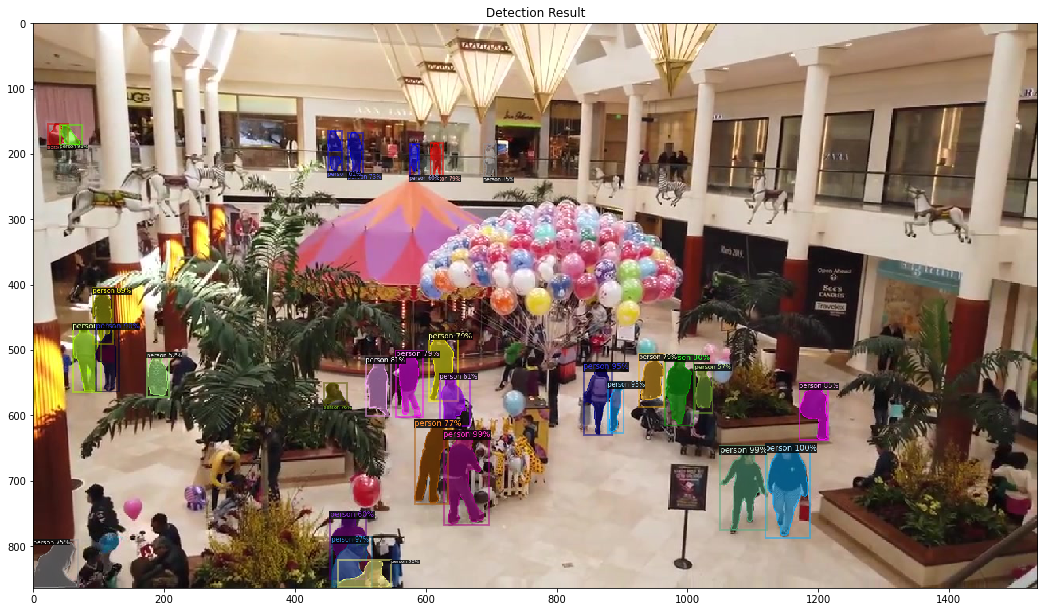

In [38]:
#Infer and visualize result
output = det.predict(img_cv)
out_img = det.visualize(img_cv,output,figsize=(18,18))

**Note**: Tada!

In [ ]:
#Code for new NAVI app demo
## Import packages
import streamlit as st
import os, shutil, cv2
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from PIL import Image
from width_control import * 
from detectron2_coco2017_labels import thing_classes,thing_colors,thing_dataset_id_to_contiguous_id

from q2_custom_code import custom_Detector as Detector
from FDK.src.core.depth import DepthEst
from FDK.src.core.utils import utils




### --------------------- Config Section ----------------------------------

## Setup page config
st.set_page_config(
    page_title="NAVI - Autonomous Hazardous Environment Helper",
    page_icon=":robot_face:",
    layout="centered"
)

#Set width adjuster
select_block_container_style()

## Instantiate detector
detector = Detector(name="MyDet",device="cpu")

## Instantiate depth estimator
depth = DepthEst(name="DeptEstimator",device="cuda")


#Helper function
@st.cache
def read_images(img_path):

    #Create placeholder
    images = []

    #List out images
    dir_imgs = os.listdir(img_path)
    dir_imgs.sort()

    #Read and save into memory
    for i in dir_imgs:
        img_ = Image.open(img_path + '/' + i)

        #Need to convert to cv2 before saving for model requirement
        img_ = utils.pil_to_cv2(img_)
        images.append(img_)

    return images


# ---------------------- NEW STUFF FOR ANSWER HERE ------------------------
classes_to_include = ["person","backpack","handbag"]


### --------------------- Header Section ----------------------------------
#Create header
st.header("Welcome to the NAVI-Core Demo")
st.markdown("""
               This is a streamlit app to demonstrate the core perception capability of 
               NAVI (hence NAVI-Core :gear:) in its ability to facilitate autonomous navigation
               in a crowded environment, with varying room layout. :smile:
               
               NAVI is a proposed Autonomous Hazardous Environment Helper designed to provide
               assistance or carry out specific tasks in understaffed and hazardous COVID-19 wards
               where human exposure should be kept to a minimum. NAVI is envisioned to be a stand-in
               robotic helper in order to alleviate the over-crowding of hospitals. Therefore,
               NAVI will need to be able to perceive a given crowded indoor environment - e.g. an 
               over-crowded ward - in order to navigate and carry its task effectively. :robot_face:

               NAVI relies on 2 modules
               from **1stDayKit**, namely the Detector and Depth Estimator module based on
               Detectron2 and MiDaS. With these modules NAVI will be able to generate depth maps in order 
               to estimate its distance from other objects in its environment, and detect relevant entities 
               such as patients and doctors with a single camera feed :camera:.""")


st.image("https://media-exp1.licdn.com/dms/image/C4D1BAQEZsgDO-UZ_Kg/company-background_10000/0?e=2159024400&v=beta&t=V6FGY5_iw_APSPfBaGCydwAso1f485R_UK5juLO5IRI",
        use_column_width=True,
        caption='Image taken from Diligent Robotics; Moxi.')



### --------------------- Upload Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)

#Create subheader
st.subheader("Provide images to begin!")
st.info("Make sure you have uploaded the images onto the cloud instance first if you are on Colab!")


#Provide pictures
img_path = st.text_input("Images dir path","None")


#Create placeholder
images = []


#If it's an images directory
if img_path != "None":

    images = read_images(img_path)
    st.success("Uploaded.")

### --------------------- Display Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)
st.subheader("Main Display")

#Create empty placeholder within proper columns
use_col_width = True 

row2_col1, row2_co12 = st.beta_columns(2)

#Detector output
with row2_col1:
    main_display_row2_col1 = st.empty()

#Depth estimator output
with row2_co12:
    main_display_row2_col2 = st.empty()

#Main raw image
with st.beta_container():
    main_display_row1_col1 = st.empty()


#Display image only if not None, otherwise error!
#Display model outputs as well; only on first image for initialisation
if img_path != "None":

        #Main raw image
        raw_display_image = utils.cv2_to_pil(images[0]) #convert back to proper format
        main_display_row2_col1.image(raw_display_image,use_column_width=use_col_width,caption="Raw",format="RGB")

        #Detector output
        detect_output = detector.predict(images[0])
        detect_output = detector.visualize(images[0], detect_output, noplot=True,classes_to_include=classes_to_include)
        detect_output = Image.fromarray(detect_output)
        main_display_row1_col1.image(detect_output,use_column_width=use_col_width,caption="Detection")

        #Depth estimator output
        depth_output = depth.predict(images[0])
        depth_output = depth_output/depth_output.max() #normalize
        depth_output = Image.fromarray(np.uint8(cm.gist_earth(depth_output)*255)).convert("RGB")
        main_display_row2_col2.image(depth_output,use_column_width=use_col_width,caption="Depth Map")



### --------------------- Editing Section ----------------------------------
st.subheader("Controls")


## Swipe frames preview
max_len = len(images) if images else 1
idx_to_run = st.slider("Preview Frame Selection",0,max_len)

if idx_to_run:
    #Main raw image
    raw_display_image = utils.cv2_to_pil(images[idx_to_run]) #convert back to proper format
    main_display_row2_col1.image(raw_display_image,use_column_width=use_col_width,caption="Raw",format="RGB")

    #Detector output
    detect_output = detector.predict(images[idx_to_run])
    detect_output = detector.visualize(images[idx_to_run], detect_output, noplot=True,classes_to_include=classes_to_include)
    detect_output = Image.fromarray(detect_output)
    main_display_row1_col1.image(detect_output,use_column_width=use_col_width,caption="Detection")

    #Depth estimator output
    depth_output = depth.predict(images[idx_to_run])
    depth_output = depth_output/depth_output.max() #normalize
    depth_output = Image.fromarray(np.uint8(cm.gist_earth(depth_output)*255)).convert("RGB")
    main_display_row2_col2.image(depth_output,use_column_width=use_col_width,caption="Depth Map")



## Frames to include
frames_bound = st.slider("Video Frames Boundary",0,len(images),(1,len(images)-1))
images_to_run = images[frames_bound[0]:frames_bound[1]]



## Class to include in detection
classes = st.multiselect("What classes to include?",thing_classes,classes_to_include)




## --------------------- End Section ----------------------------------
#Section off with line
st.markdown('<hr>', unsafe_allow_html=True)
st.subheader("Finished? Save Results and Clear Workspace!")


#Apply model on all images and save out
if st.button("Run All and Save"):

    st.info("This will create new folders in the current working dir to save.")

    #Check folder
    if not os.path.isdir("detector_output"):
        os.mkdir("detector_output")

    if not os.path.isdir("depth_output"):
        os.mkdir("depth_output")


    for idx,i in enumerate(images_to_run):

        #Detector output
        detect_output = detector.predict(i)
        detect_output = detector.visualize(i, detect_output, noplot=Tru,classes_to_include=classes_to_include)
        detect_output = Image.fromarray(detect_output)

        #Depth estimator output
        depth_output = depth.predict(i)
        depth_output = depth_output/depth_output.max() #normalize
        depth_output = Image.fromarray(np.uint8(cm.gist_earth(depth_output)*255)).convert("RGB")

        #Save
        detect_output.save("detector_output/detect_{:05d}.jpg".format(idx))
        depth_output.save("depth_output/depth_{:05d}.jpg".format(idx))


#Clean up taxing objects
if st.button("Clear Workspace"):
    del images, detector, depth


In [ ]:
#Try it out!
!streamlit run q2_answer_app.py

### That's All!